<Axes: >

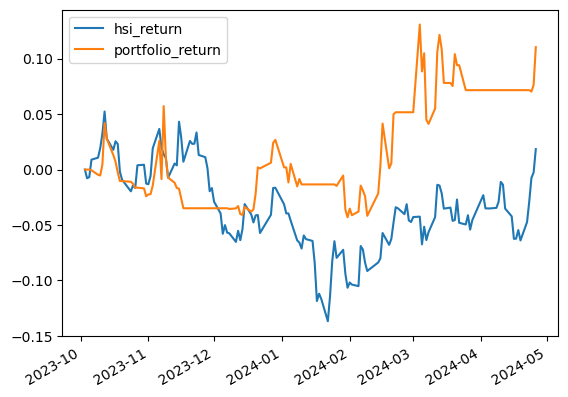

In [143]:
import pandas as pd, yfinance as yf, datetime as dt
fname = 'simulate_trade_record_2023-10-1.json'
jfile = pd.read_json(fname) 
df = pd.DataFrame(jfile).iloc[1:]
df.set_index('date',inplace=True)
df['assets']= df.daily_portfolio.apply(lambda x: list(x.keys()))
df[['assets','portfolio_total_capital']].to_csv('hold_assets.csv')
portfolio_return = df.portfolio_total_capital.apply(lambda x: x/100000-1)

start = fname.split('_')[-1].split('.')[0]
today = str(dt.date.today()+dt.timedelta(days=1))
hsi = yf.download('^HSI',start=start,end=today,progress=False)
hsi_return = hsi.Close/hsi.Close.iloc[0]-1
df_return = pd.merge(hsi_return, portfolio_return, how='inner', left_index=True, right_index=True)
df_return.columns=['hsi_return','portfolio_return']
df_return.plot()
